In [1]:
#Importing The Necessary Modules 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [2]:
# Reading CSV File and Assigning It to a Variable

covid = pd.read_csv("Covid_Data.csv")

In [3]:
# Checking For Null or Empty Values in The CSV File
# False = No Null Values
# True = Null Values Are Present

covid.isnull()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Checking The Datatype of The Columns

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
# Renaming Columns with Incorrect Spellings and Applying Changes Directly to The Original DataFrame

covid.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)

covid.rename(columns={'HIPERTENSION': 'HYPERTENSION'}, inplace=True)

In [6]:
# Changing The Values in The SEX Column as Instructed 

sex_class = {
    "1": "Female",
    "2": "Male"
}
covid["SEX"] = covid["SEX"].astype(str).replace(sex_class)

In [7]:
# Changing The Values in The CLASSIFICATION FINAL Column as Instructed and Applying Changes Directly to The Original DataFrame

class_final = {
    "1": "Critical",
    "2": "Medium",
    "3": "Mild",
    "97": "Missing Values",
    "98": "Missing Values",
    "99": "Missing Values"
}
covid["CLASSIFICATION_FINAL"] = covid["CLASSIFICATION_FINAL"].astype(str).map(class_final)
covid["CLASSIFICATION_FINAL"].replace(to_replace={pd.NA: "Negative"}, inplace=True)

In [8]:
# Changing The Values in The PATIENT TYPE Column as Instructed

care_type = {
    "1": "Returned Home",
    "2": "Hospitalization",
    "97": "Missing Data",
    "98": "Missing Data",
    "99": "Missing Data"
}
covid["PATIENT_TYPE"] = covid["PATIENT_TYPE"].astype(str).replace(care_type)

In [9]:
# Changing The Values for The Rest of The Columns as Instructed

monia = {
    "1": "Yes",
    "2": "No",
    "97": "Missing Data",
    "98": "Missing Data",
    "99": "Missing Data"
}
covid["PNEUMONIA"] = covid["PNEUMONIA"].astype(str).replace(monia)
covid["PREGNANT"] = covid["PREGNANT"].astype(str).replace(monia)
covid["DIABETES"] = covid["DIABETES"].astype(str).replace(monia)
covid["COPD"] = covid["COPD"].astype(str).replace(monia)
covid["ASTHMA"] = covid["ASTHMA"].astype(str).replace(monia)
covid["INMSUPR"] = covid["INMSUPR"].astype(str).replace(monia)
covid["HYPERTENSION"] = covid["HYPERTENSION"].astype(str).replace(monia)
covid["CARDIOVASCULAR"] = covid["CARDIOVASCULAR"].astype(str).replace(monia)
covid["RENAL_CHRONIC"] = covid["RENAL_CHRONIC"].astype(str).replace(monia)
covid["OTHER_DISEASE"] = covid["OTHER_DISEASE"].astype(str).replace(monia)
covid["OBESITY"] = covid["OBESITY"].astype(str).replace(monia)
covid["TOBACCO"] = covid["TOBACCO"].astype(str).replace(monia)
covid["USMER"] = covid["USMER"].astype(str).replace(monia)
covid["INTUBED"] = covid["INTUBED"].astype(str).replace(monia)
covid["ICU"] = covid["ICU"].astype(str).replace(monia)

In [10]:
# Changing the Date in the DATE_DIED column as instructed

covid["DATE_DIED"] = covid["DATE_DIED"].astype(str).replace("9999-99-99","9999-01-02")

In [11]:
covid.to_csv('filename.csv', index=False)

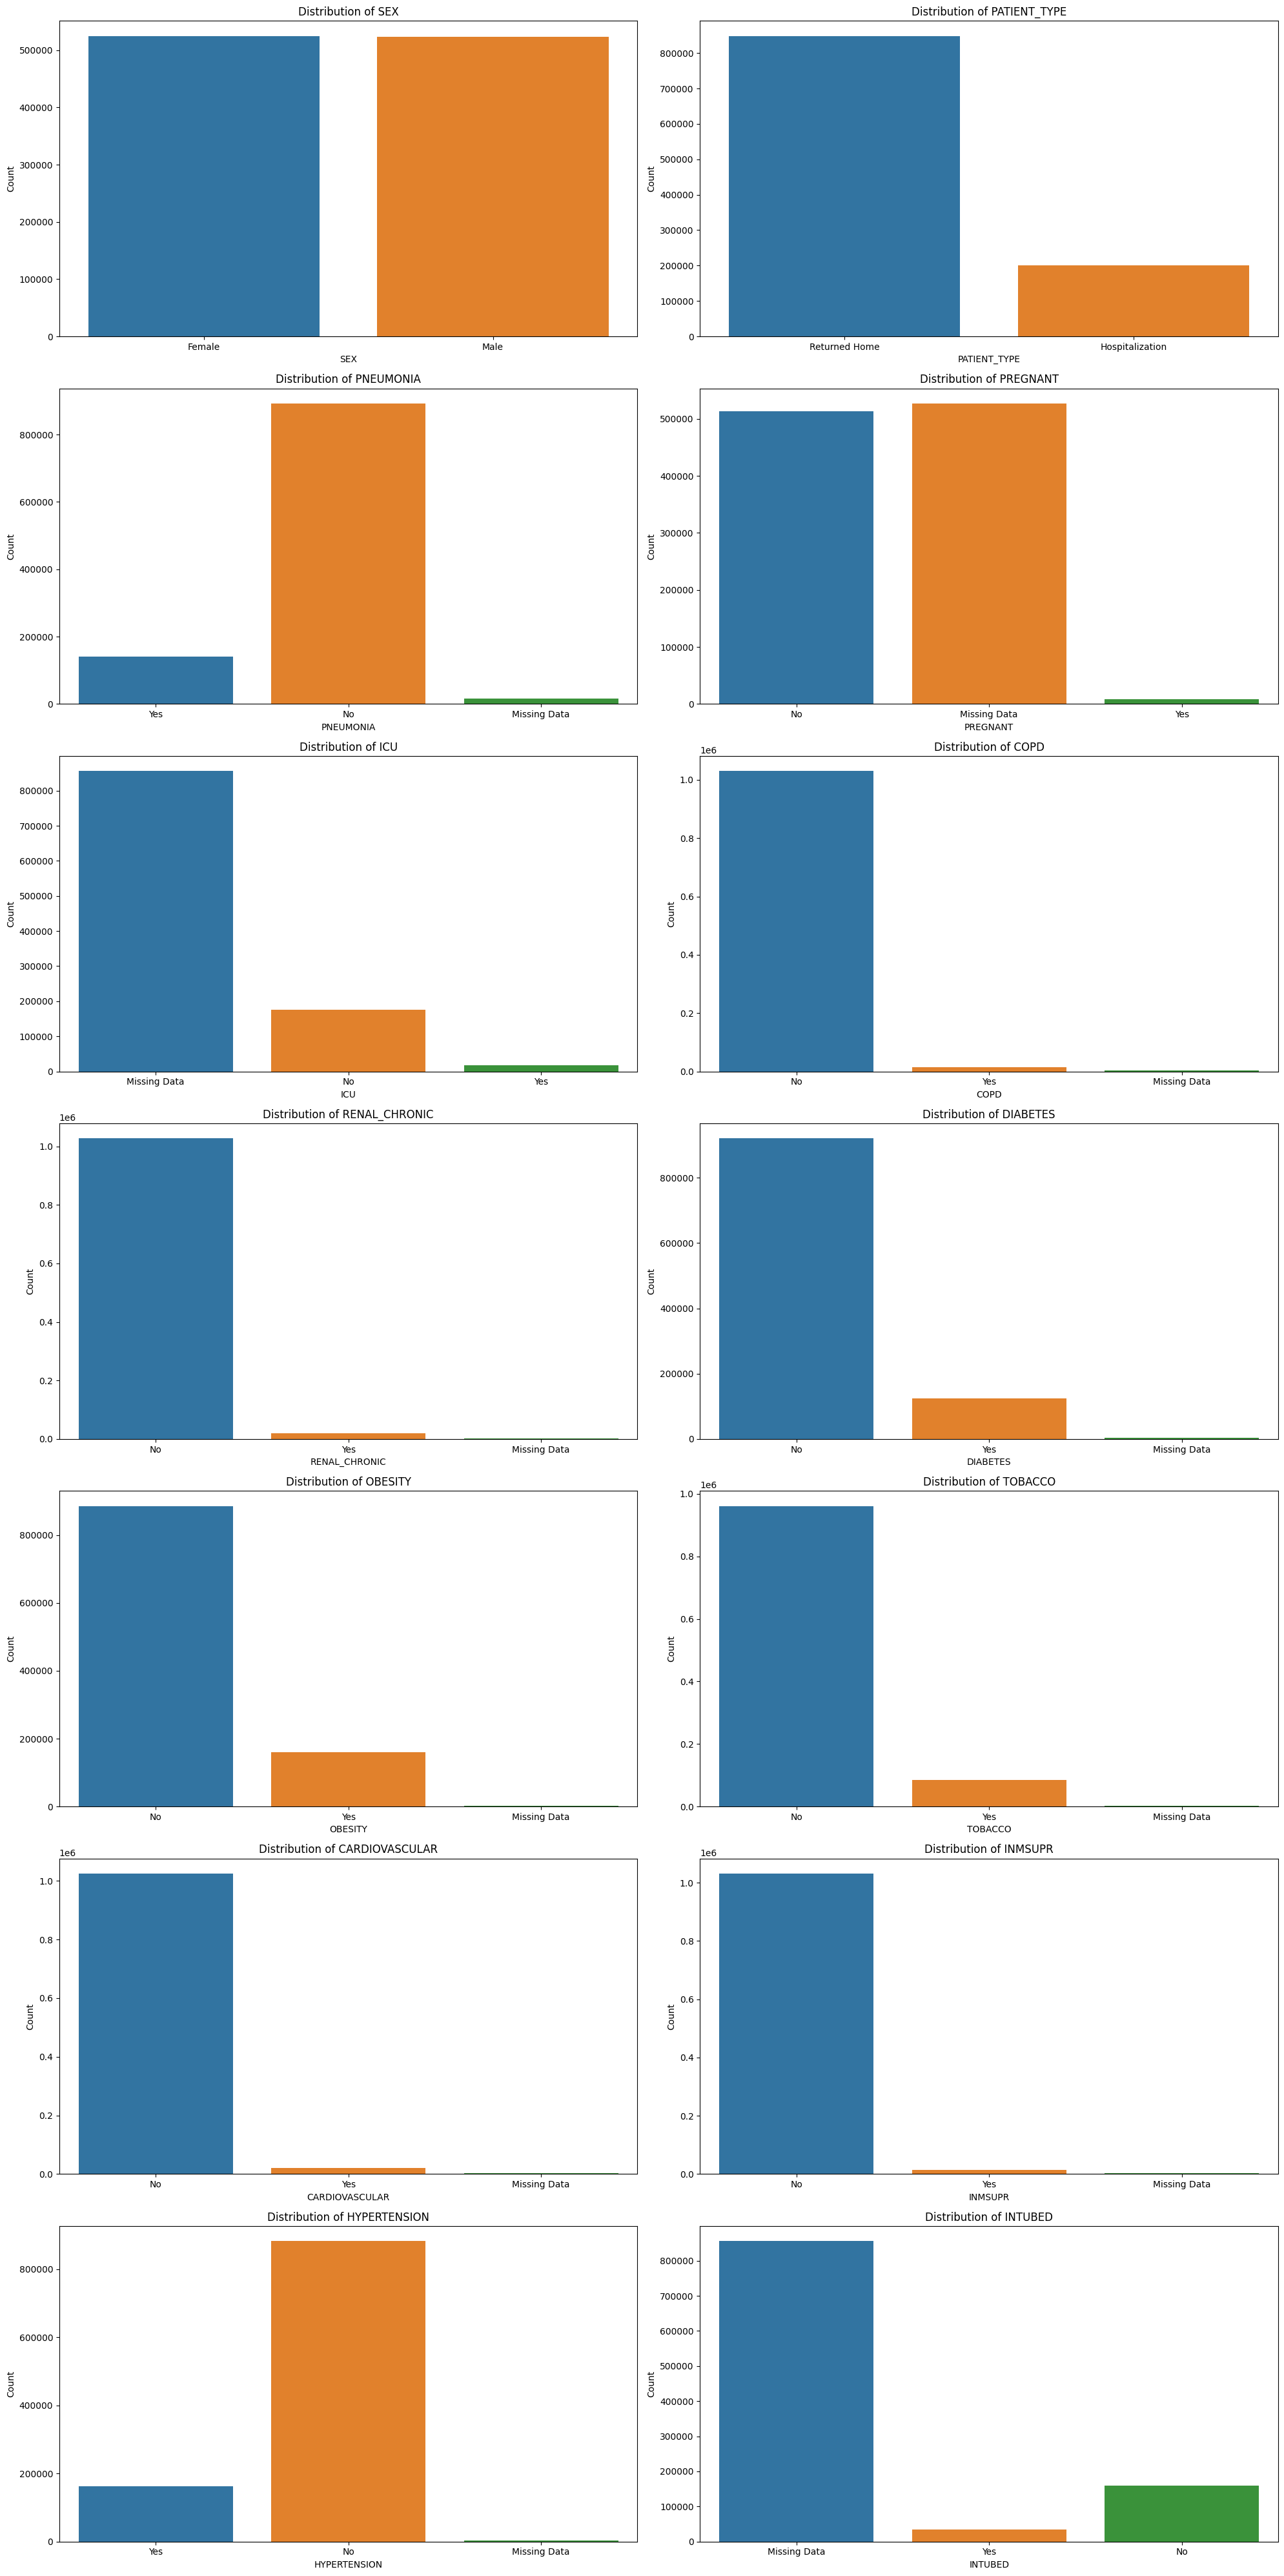

In [12]:
# Used Bar Chart to Represent the Proportion of 'Yes','No' and 'Missing Data'

categorical_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT','ICU','COPD','RENAL_CHRONIC','DIABETES','OBESITY','TOBACCO','CARDIOVASCULAR','INMSUPR','HYPERTENSION','INTUBED']

plt.figure(figsize=(20, 40))
grid_size = (len(categorical_columns) // 2, 2)

for i, col in enumerate(categorical_columns):
    plt.subplot(*grid_size, i+1)
    sns.countplot(data=covid, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


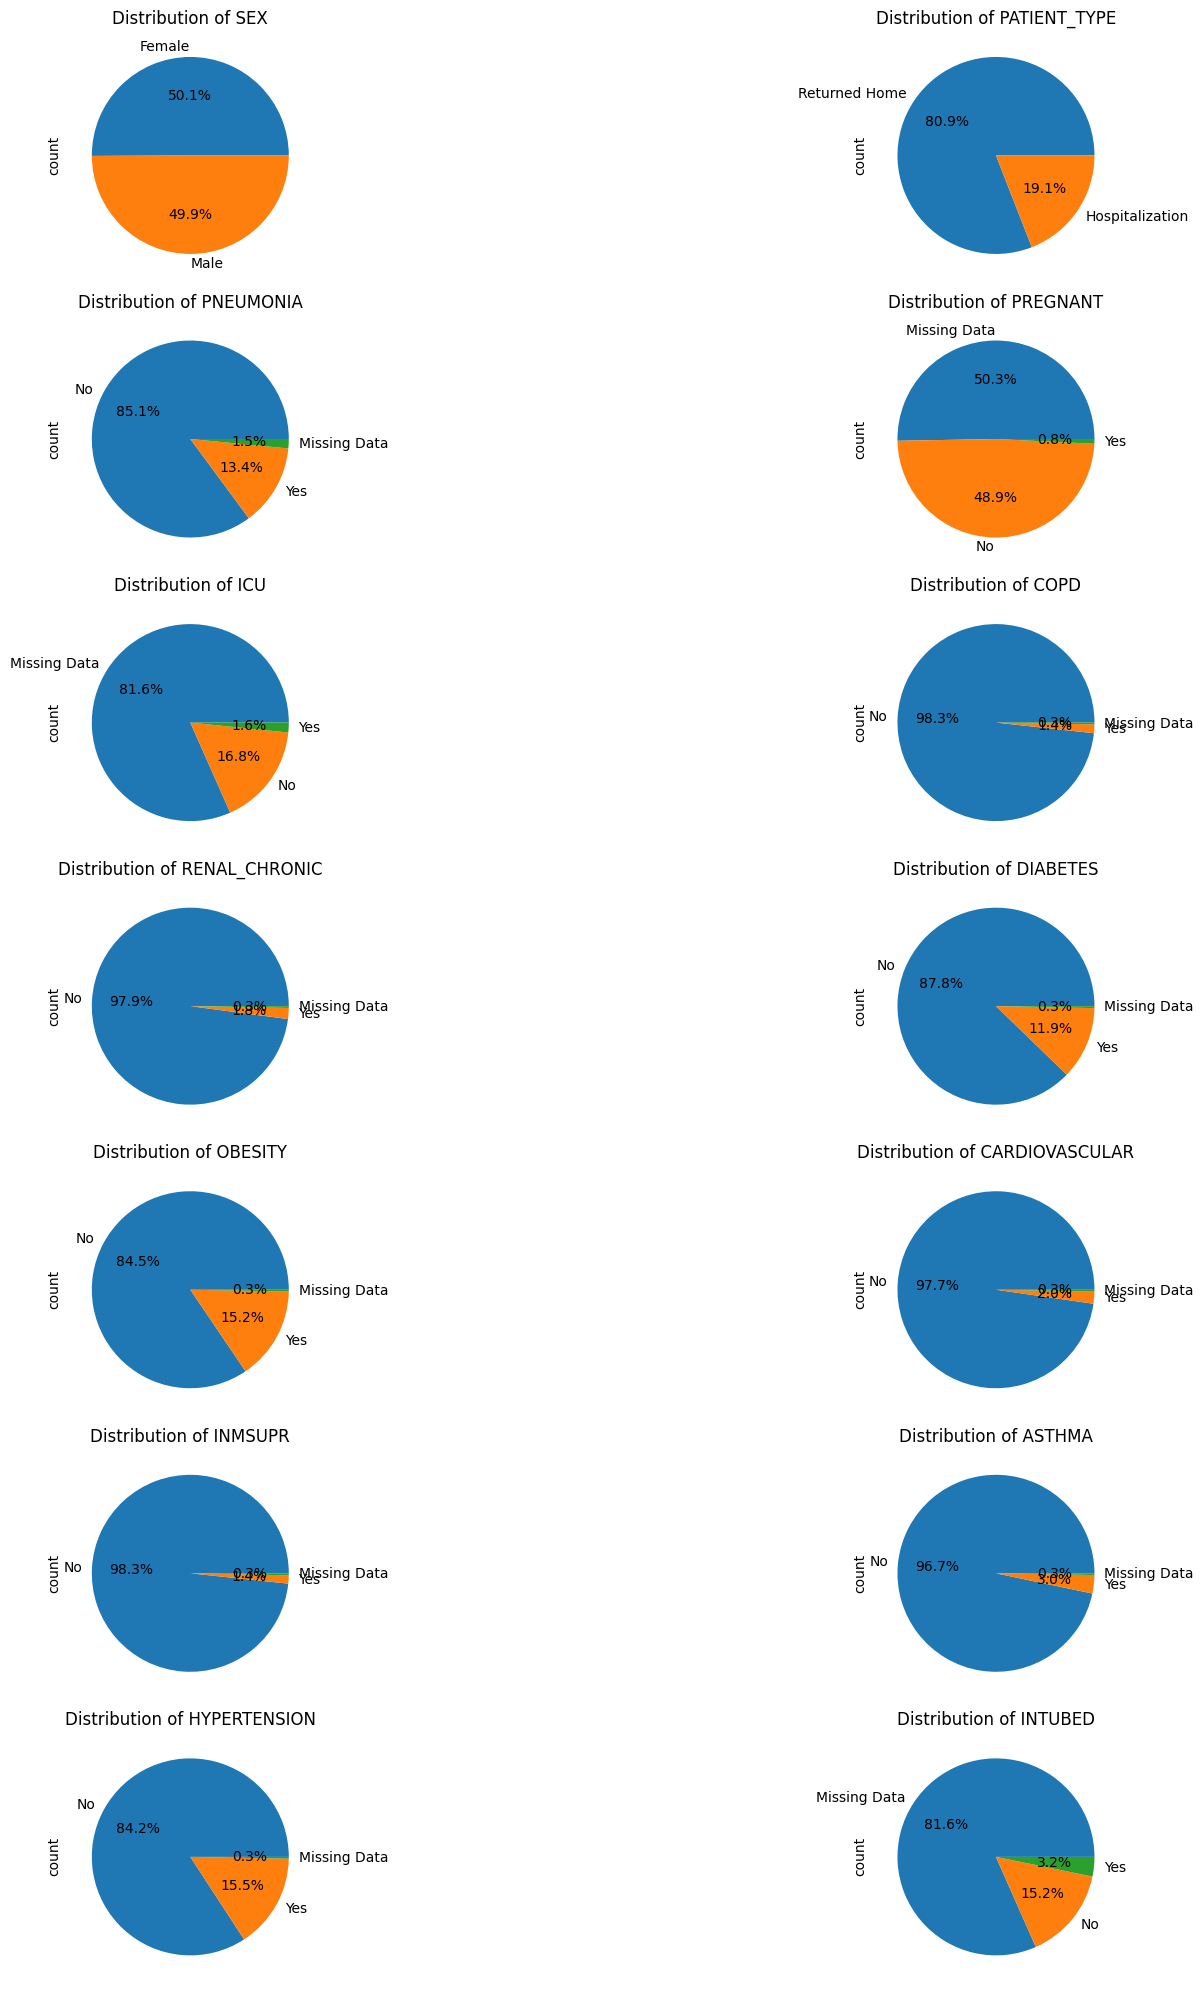

In [13]:
# Used Pie Chart to Represent the Proportion of 'Yes','No' and 'Missing Data' in all the Columns

categorical_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'ICU', 'COPD', 'RENAL_CHRONIC', 'DIABETES',
                       'OBESITY', 'CARDIOVASCULAR', 'INMSUPR', 'ASTHMA' ,'HYPERTENSION', 'INTUBED']

plt.figure(figsize=(20, 20))
grid_size = (len(categorical_columns) // 2, 2)

for i, col in enumerate(categorical_columns):
    plt.subplot(*grid_size, i+1)
    covid[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

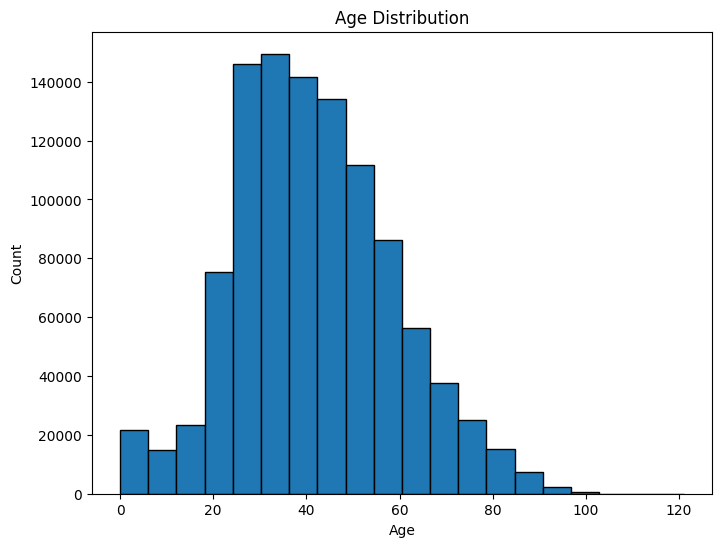

In [14]:
# Histogram to Visualize the Distribution of the Patient Age in the Age Column

plt.figure(figsize=(8, 6))
plt.hist(covid['AGE'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

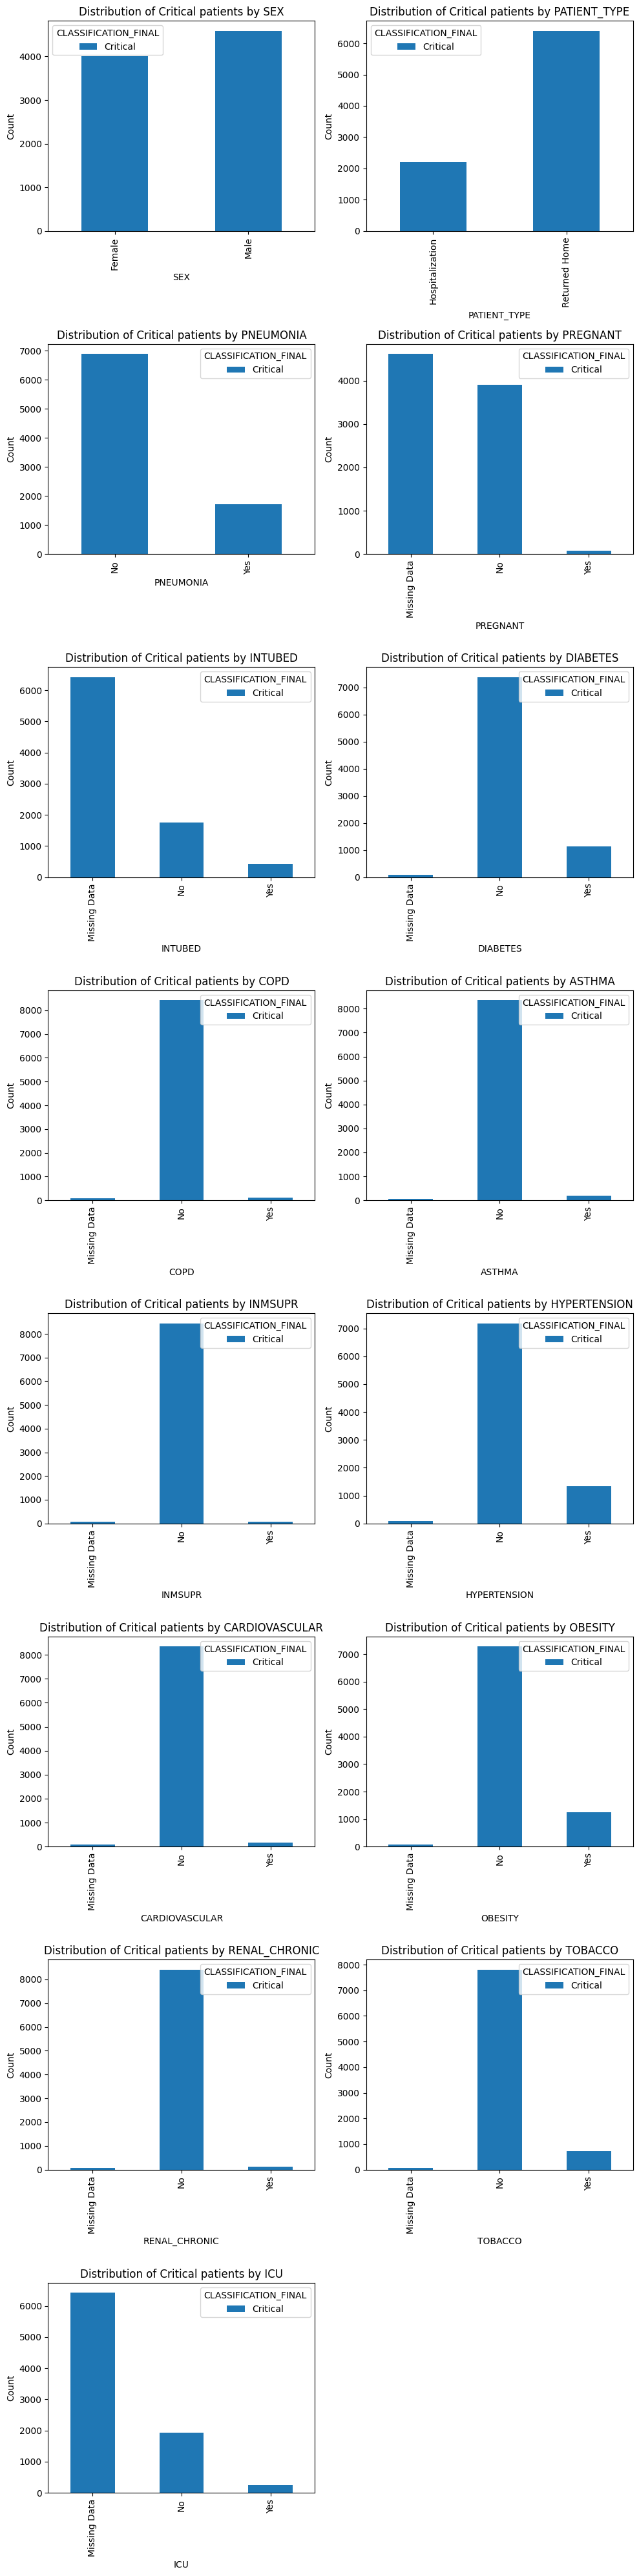

In [15]:
# Stacked Bar Chart to Show the Relationship Between The Columns and The Patient Covid Classification

categorical_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'INTUBED', 'DIABETES', 'COPD', 'ASTHMA',
                       'INMSUPR', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
                       'TOBACCO', 'ICU']

num_subplots = len(categorical_columns)
num_rows = (num_subplots + 1) // 2
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5 * num_rows))
axes = axes.flatten()

critical_data = covid[covid['CLASSIFICATION_FINAL']== "Critical"]

for i, col in enumerate(categorical_columns):
    cross_tab = pd.crosstab(critical_data[col], critical_data['CLASSIFICATION_FINAL'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Critical patients by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for i in range(num_subplots, num_rows * num_cols):
    axes[i].axis('off')

    plt.tight_layout()

    plt.show()


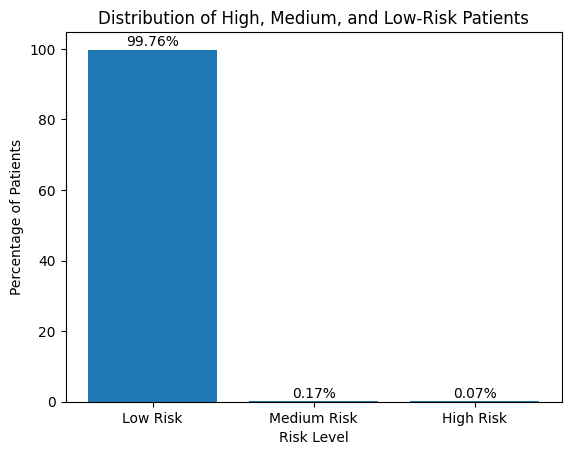

In [16]:
# This is to Calculate Risk Score and Check For High Risk and Low Risk Patients Based On The Already Established Criteria


def checkforhighrisk(row):
    if row['CLASSIFICATION_FINAL'] == 'Critical':
        highriskconditions = ['ICU', 'COPD', 'OBESITY', 'HYPERTENSION', 'INMSUPR', 'CARDIOVASCULAR']
        highriskpresence = any(row[condition] == 'Yes' for condition in highriskconditions)
        ageover60 = row['AGE'] > 60

        if highriskpresence and ageover60:
            return 'High Risk'
        elif highriskpresence:
            return 'Medium Risk'
        else:
            return 'Low Risk'
    else:
        return 'Low Risk'

covid['RISK LEVEL'] = covid.apply(checkforhighrisk, axis=1)

risk_counts = covid['RISK LEVEL'].value_counts()

total_patients = len(covid)
risk_percentages = (risk_counts / total_patients) * 100

plt.bar(risk_percentages.index, risk_percentages.values)

plt.xlabel('Risk Level')
plt.ylabel('Percentage of Patients')
plt.title('Distribution of High, Medium, and Low-Risk Patients')

for i, v in enumerate(risk_percentages.values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10)

plt.show()


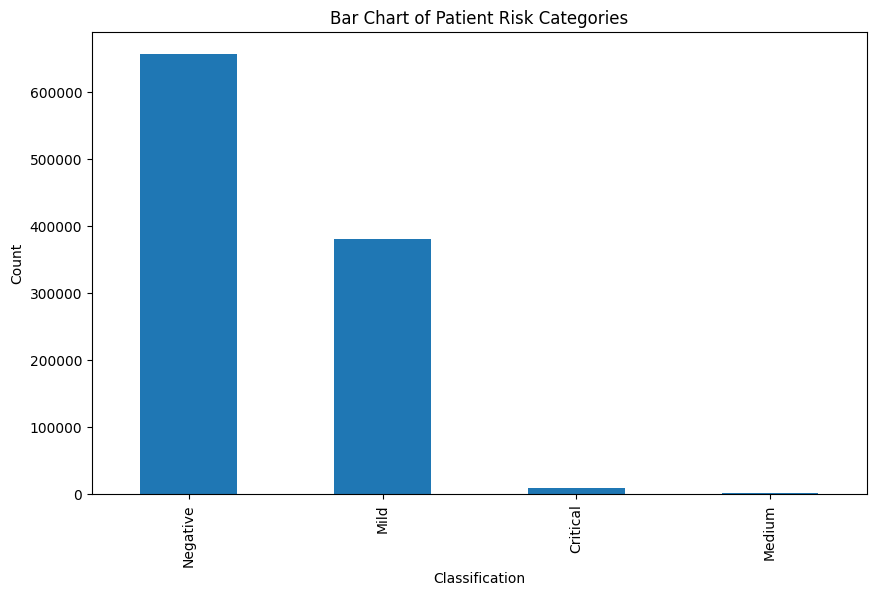

In [17]:

# The count of values in the Classification Final Column

classification_counts = covid['CLASSIFICATION_FINAL'].value_counts()

plt.figure(figsize=(10, 6))
classification_counts.plot(kind='bar')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Bar Chart of Patient Risk Categories')
plt.show()


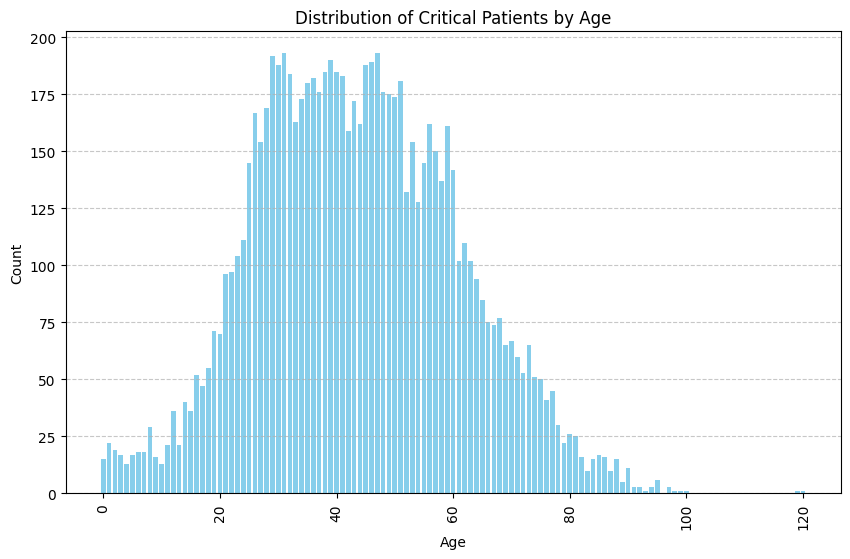

In [18]:
# The Distribution of Patient Age based on the Critical Value in 

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']

age_distribution = critical_data['AGE'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Critical Patients by Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()


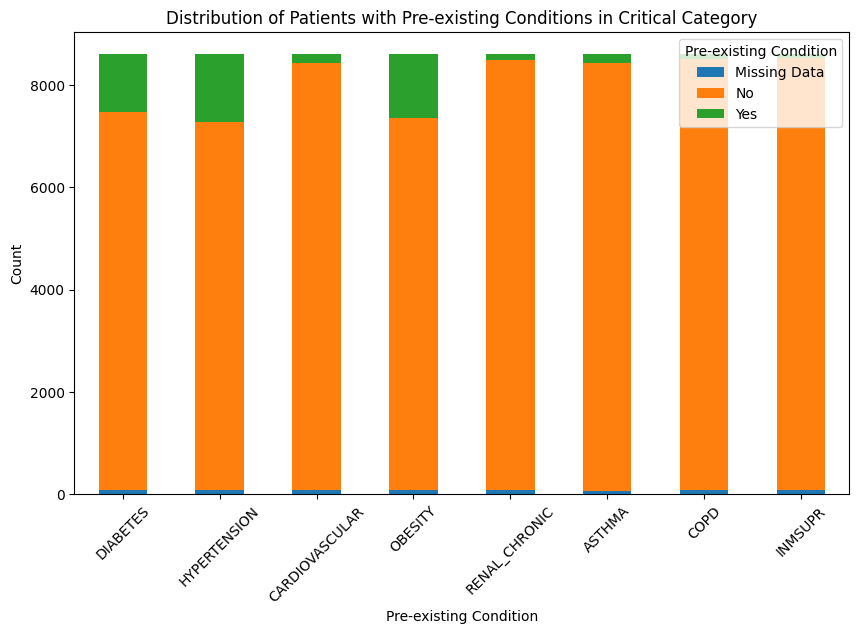

In [19]:


critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']

preexisting_conditions = ['DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'ASTHMA', 'COPD', 'INMSUPR']

preexisting_conditions_count = critical_data[preexisting_conditions].apply(lambda x: x.value_counts())

preexisting_conditions_count.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Patients with Pre-existing Conditions in Critical Category')
plt.xlabel('Pre-existing Condition')
plt.ylabel('Count')
plt.legend(title='Pre-existing Condition', loc='upper right')
plt.xticks(rotation=45)

plt.show()


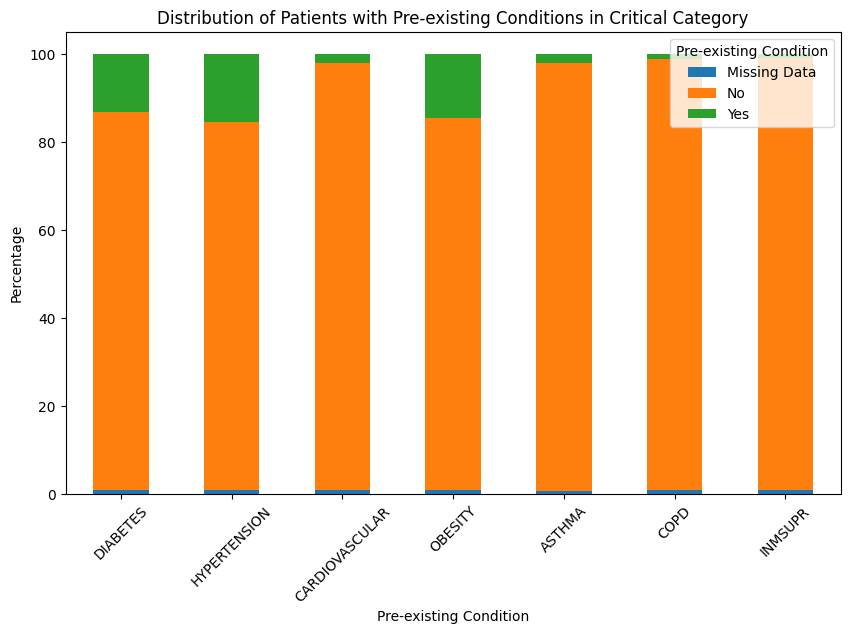

In [20]:

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']

preexisting_conditions = ['DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'ASTHMA', 'COPD', 'INMSUPR']

preexisting_conditions_count = critical_data[preexisting_conditions].apply(lambda x: x.value_counts())

preexisting_conditions_percentages = preexisting_conditions_count / preexisting_conditions_count.sum() * 100

preexisting_conditions_percentages.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Patients with Pre-existing Conditions in Critical Category')
plt.xlabel('Pre-existing Condition')
plt.ylabel('Percentage')
plt.legend(title='Pre-existing Condition', loc='upper right')
plt.xticks(rotation=45)

plt.show()


In [21]:

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']

preexisting_conditions = ['DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'ASTHMA', 'COPD', 'INMSUPR']
preexisting_conditions_count = critical_data[preexisting_conditions].apply(lambda x: x.value_counts())

preexisting_conditions_percentages = preexisting_conditions_count / preexisting_conditions_count.sum() * 100

print("Percentages of 'Yes' and 'No' values for each pre-existing condition in the 'Critical' risk category:")
print(preexisting_conditions_percentages)


Percentages of 'Yes' and 'No' values for each pre-existing condition in the 'Critical' risk category:
               DIABETES  HYPERTENSION  CARDIOVASCULAR    OBESITY  \
Missing Data   1.046390      1.034763        1.011510   0.906871   
No            85.815603     83.443786       97.011975  84.606441   
Yes           13.138007     15.521451        1.976514  14.486688   

              RENAL_CHRONIC     ASTHMA       COPD    INMSUPR  
Missing Data       0.918498   0.825485   0.918498   0.976631  
No                97.721195  97.070108  97.918847  98.139751  
Yes                1.360307   2.104406   1.162656   0.883618  


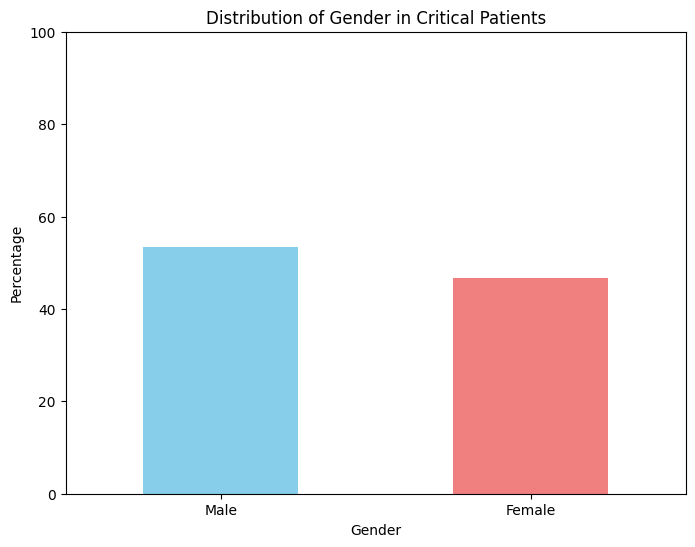

In [22]:

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']

gender_counts = critical_data['SEX'].value_counts()

total_patients = len(critical_data)
gender_percentages = (gender_counts / total_patients) * 100

plt.figure(figsize=(8, 6))
gender_percentages.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender in Critical Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100) 
plt.show()


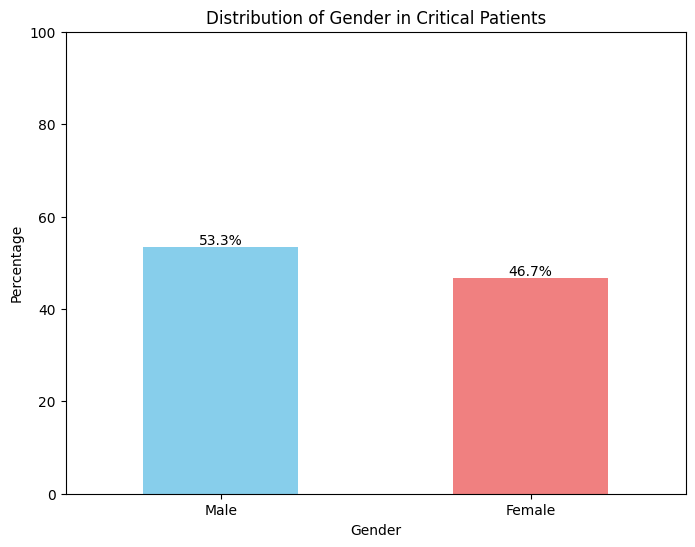

In [23]:

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']


gender_counts = critical_data['SEX'].value_counts()

total_patients = len(critical_data)
gender_percentages = (gender_counts / total_patients) * 100

plt.figure(figsize=(8, 6))
ax = gender_percentages.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender in Critical Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.ylim(0, 100) 
plt.show()


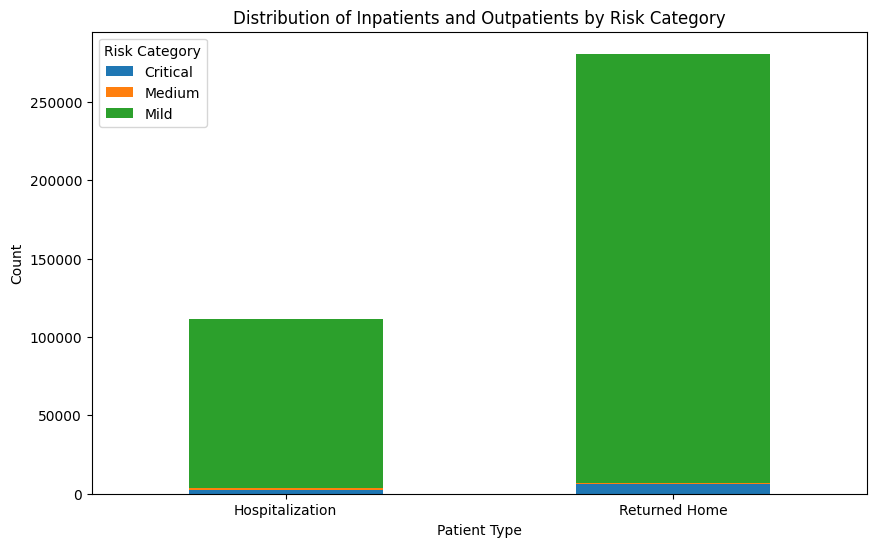

In [27]:
critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']
medium_data = covid[covid['CLASSIFICATION_FINAL'] == 'Medium']
mild_data = covid[covid['CLASSIFICATION_FINAL'] == 'Mild']

critical_counts = critical_data['PATIENT_TYPE'].value_counts()
medium_counts = medium_data['PATIENT_TYPE'].value_counts()
mild_counts = mild_data['PATIENT_TYPE'].value_counts()


data = pd.DataFrame({'Critical': critical_counts, 'Medium': medium_counts, 'Mild': mild_counts})

data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Inpatients and Outpatients by Risk Category')
plt.xlabel('Patient Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Risk Category')
plt.show()


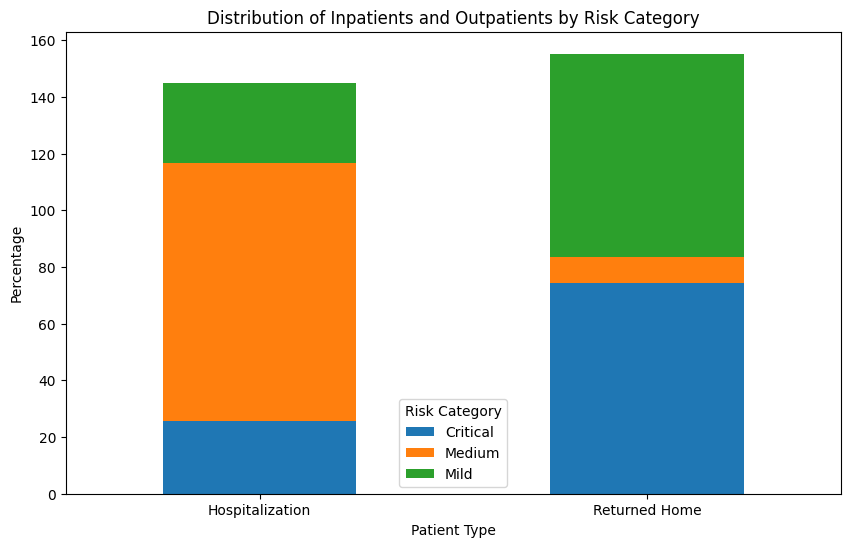

Percentage of Inpatients and Outpatients in Each Risk Category:
                  Critical     Medium      Mild
PATIENT_TYPE                                   
Hospitalization  25.601674  91.031875  28.15135
Returned Home    74.398326   8.968125  71.84865


In [ ]:

critical_data = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']
medium_data = covid[covid['CLASSIFICATION_FINAL'] == 'Medium']
mild_data = covid[covid['CLASSIFICATION_FINAL'] == 'Mild']

critical_counts = critical_data['PATIENT_TYPE'].value_counts(normalize=True) * 100
medium_counts = medium_data['PATIENT_TYPE'].value_counts(normalize=True) * 100
mild_counts = mild_data['PATIENT_TYPE'].value_counts(normalize=True) * 100

data = pd.DataFrame({'Critical': critical_counts, 'Medium': medium_counts, 'Mild': mild_counts})


data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Inpatients and Outpatients by Risk Category')
plt.xlabel('Patient Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Risk Category')
plt.show()

print("Percentage of Inpatients and Outpatients in Each Risk Category:")
print(data)


In [25]:
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU,RISK LEVEL
0,No,1,Female,Returned Home,03/05/2020,Missing Data,Yes,65,No,No,...,No,Yes,No,No,No,No,No,Mild,Missing Data,Low Risk
1,No,1,Male,Returned Home,03/06/2020,Missing Data,Yes,72,Missing Data,No,...,No,Yes,No,No,Yes,Yes,No,Negative,Missing Data,Low Risk
2,No,1,Male,Hospitalization,09/06/2020,Yes,No,55,Missing Data,Yes,...,No,No,No,No,No,No,No,Mild,No,Low Risk
3,No,1,Female,Returned Home,12/06/2020,Missing Data,No,53,No,No,...,No,No,No,No,No,No,No,Negative,Missing Data,Low Risk
4,No,1,Male,Returned Home,21/06/2020,Missing Data,No,68,Missing Data,Yes,...,No,Yes,No,No,No,No,No,Mild,Missing Data,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,No,13,Male,Returned Home,9999-01-02,Missing Data,No,40,Missing Data,No,...,No,No,No,No,No,No,No,Negative,Missing Data,Low Risk
1048571,Yes,13,Male,Hospitalization,9999-01-02,No,No,51,Missing Data,No,...,No,Yes,No,No,No,No,No,Negative,No,Low Risk
1048572,No,13,Male,Returned Home,9999-01-02,Missing Data,No,55,Missing Data,No,...,No,No,No,No,No,No,No,Negative,Missing Data,Low Risk
1048573,No,13,Male,Returned Home,9999-01-02,Missing Data,No,28,Missing Data,No,...,No,No,No,No,No,No,No,Negative,Missing Data,Low Risk


In [26]:
covid["RISK LEVEL"].value_counts()

RISK LEVEL
Low Risk       1046079
Medium Risk       1759
High Risk          737
Name: count, dtype: int64